Reference: https://github.com/enakai00/jupyter_tfbook

In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle

tf.logging.set_verbosity(tf.logging.ERROR)

np.random.seed(20180815)
tf.set_random_seed(20180815)

In [39]:
with open('./data/ORENIST.data', 'rb') as file:
    images, labels = pickle.load(file, encoding='bytes')
    
def edge_filter():
    
    filter0 = np.array(
    [[ 2, 1, 0,-1,-2],
     [ 3, 2, 0,-2,-3],
     [ 4, 3, 0,-3,-4],
     [ 3, 2, 0,-2,-3],
     [ 2, 1, 0,-1,-2]]) / 23.0
    
    filter1 = np.array(
    [[ 2, 3, 4, 3 ,2],
     [ 1, 2, 3, 2, 1],
     [ 0, 0, 0, 0, 0],
     [-1,-2,-3,-2,-1],
     [-2,-3,-4,-3,-2]]) / 23.0
    
    filter_array = np.zeros([5,5,1,2])
    filter_array[:,:,0,0] = filter0
    filter_array[:,:,0,1] = filter1
    
    return tf.constant(filter_array, dtype=tf.float32)

In [40]:
x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1, 28, 28, 1])

W_conv = edge_filter()
h_conv = tf.abs(tf.nn.conv2d(x_image, W_conv, strides=[1,1,1,1], padding='SAME'))
h_conv_cutoff = tf.nn.relu(h_conv - 0.2)
h_pool = tf.nn.max_pool(h_conv_cutoff, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [41]:
h_pool_flat = tf.reshape(h_pool, [-1, 392])

num_units1 = 392
num_units2 = 2

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.tanh(tf.matmul(h_pool_flat, w2) + b2)

w0 = tf.Variable(tf.zeros([num_units2, 3]))
b0 = tf.Variable(tf.zeros([3]))
p = tf.nn.softmax(tf.matmul(hidden2, w0) + b0)

In [42]:
t = tf.placeholder(tf.float32, [None, 3])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [43]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [44]:
i = 0
for _ in range(200):
    i += 1
    sess.run(train_step, feed_dict={x:images, t:labels})
    if i % 10 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:images, t:labels})
        print('Step: {}, Loss: {}, Accuracy: {}'.format(i, loss_val, acc_val))

Step: 10, Loss: 98.58189392089844, Accuracy: 0.47777777910232544
Step: 20, Loss: 98.07327270507812, Accuracy: 0.4888888895511627
Step: 30, Loss: 97.2839584350586, Accuracy: 0.5333333611488342
Step: 40, Loss: 96.15874481201172, Accuracy: 0.5333333611488342
Step: 50, Loss: 94.6746597290039, Accuracy: 0.5777778029441833
Step: 60, Loss: 92.85591888427734, Accuracy: 0.644444465637207
Step: 70, Loss: 90.80573272705078, Accuracy: 0.6777777671813965
Step: 80, Loss: 88.56009674072266, Accuracy: 0.6555555462837219
Step: 90, Loss: 86.12139892578125, Accuracy: 0.6777777671813965
Step: 100, Loss: 83.63199615478516, Accuracy: 0.699999988079071
Step: 110, Loss: 81.28279113769531, Accuracy: 0.6888889074325562
Step: 120, Loss: 79.18629455566406, Accuracy: 0.6777777671813965
Step: 130, Loss: 77.32987213134766, Accuracy: 0.6666666865348816
Step: 140, Loss: 75.6806869506836, Accuracy: 0.644444465637207
Step: 150, Loss: 74.19886779785156, Accuracy: 0.6555555462837219
Step: 160, Loss: 72.84625244140625, Acc

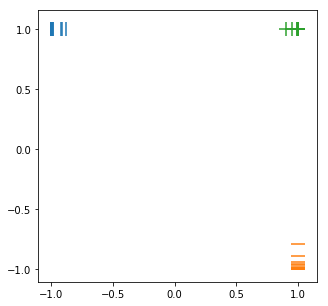

In [36]:
hidden2_vals = sess.run(hidden2, feed_dict={x:images})

z1_vals = [[], [], []]
z2_vals = [[], [], []]

for hidden2_val, label in zip(hidden2_vals, labels):
    label_num = np.argmax(label)
    z1_vals[label_num].append(hidden2_val[0])
    z2_vals[label_num].append(hidden2_val[1])

fig = plt.figure(figsize=(5,5))
subplot = fig.add_subplot(1,1,1)
subplot.scatter(z1_vals[0], z2_vals[0], s=200, marker='|')
subplot.scatter(z1_vals[1], z2_vals[1], s=200, marker='_')
subplot.scatter(z1_vals[2], z2_vals[2], s=200, marker='+')

In [37]:
sess.close()